Mounted at /content/drive
Contents of extract_path:
['malaria_dataset']
Found 27558 images belonging to 2 classes.
Found 3132 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


862/862 ━━━━━━━━━━━━━━━━━━━━ 75s 79ms/step - accuracy: 0.7808 - loss: 0.4331 - val_accuracy: 0.9266 - val_loss: 0.2349
Epoch 2/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 73s 75ms/step - accuracy: 0.9453 - loss: 0.1725 - val_accuracy: 0.9358 - val_loss: 0.2131
Epoch 3/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 63s 73ms/step - accuracy: 0.9536 - loss: 0.1530 - val_accuracy: 0.9409 - val_loss: 0.1769
Epoch 4/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 68s 78ms/step - accuracy: 0.9500 - loss: 0.1491 - val_accuracy: 0.9361 - val_loss: 0.1812
Epoch 5/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.9557 - loss: 0.1349 - val_accuracy: 0.9400 - val_loss: 0.1654
Epoch 6/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 63s 73ms/step - accuracy: 0.9568 - loss: 0.1344 - val_accuracy: 0.9397 - val_loss: 0.1876
Epoch 7/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 64s 74ms/step - accuracy: 0.9562 - loss: 0.1300 - val_accuracy: 0.9451 - val_loss: 0.1861
Epoch 8/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 65s 75ms/step - accuracy: 0.9564 - loss: 0.1302 - val_accurac

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9443 - loss: 0.1564
Test Loss: 0.16539177298545837
Test Accuracy: 0.9399744868278503
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step
Confusion Matrix
[[840 813]
 [779 700]]


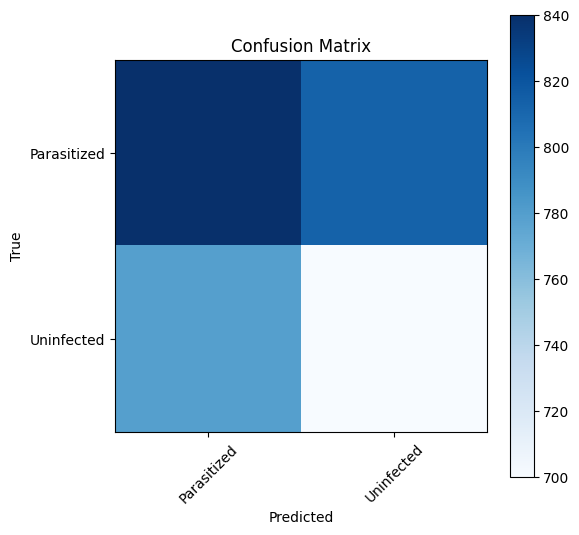

Classification Report
              precision    recall  f1-score   support

 Parasitized       0.52      0.51      0.51      1653
  Uninfected       0.46      0.47      0.47      1479

    accuracy                           0.49      3132
   macro avg       0.49      0.49      0.49      3132
weighted avg       0.49      0.49      0.49      3132


Final Training Accuracy: 95.66%
Final Training Loss: 0.1296
Final Validation Accuracy: 94.16%
Final Validation Loss: 0.1769


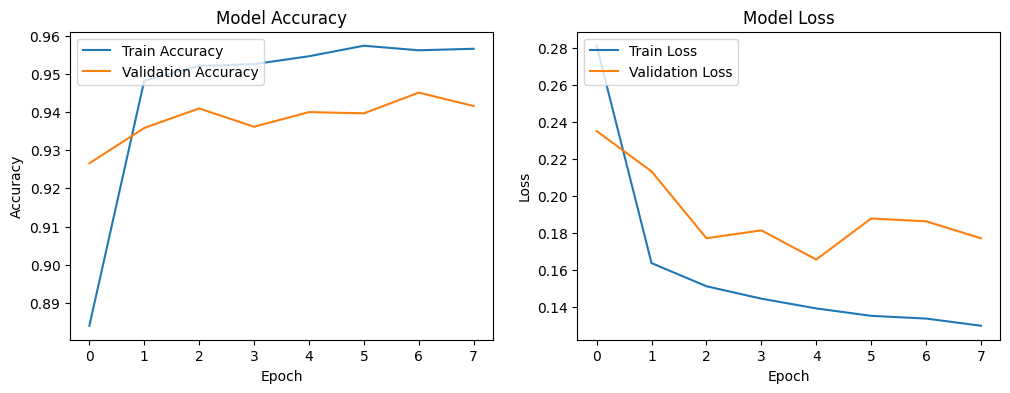

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import zipfile

# Unzip the dataset
zip_path = '/content/drive/My Drive/malaria_dataset.zip'
extract_path = '/content/malaria_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction and list contents
print("Contents of extract_path:")
print(os.listdir(extract_path))

# Define paths
dataset_dir = os.path.join(extract_path, 'malaria_dataset')
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Check if train and test directories exist
if not os.path.isdir(train_dir) or not os.path.isdir(test_dir):
    print("Error: Train or test directory not found.")
else:
    # Image Data Generators
    train_datagen = ImageDataGenerator(rescale=1. / 255,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1. / 255)

    train_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

    test_generator = test_datagen.flow_from_directory(test_dir,
                                                      target_size=(64, 64),
                                                      batch_size=32,
                                                      class_mode='binary')

    # Model Architecture
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Model Training
    history = model.fit(train_generator,
                        epochs=20,
                        validation_data=test_generator,
                        callbacks=[early_stopping])

    # Save the model
    model_save_path = '/content/drive/My Drive/model/malaria.h5'
    model.save(model_save_path)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_acc}')

    # Predicting the Test set results
    Y_pred = model.predict(test_generator)
    y_pred = np.round(Y_pred).astype(int)

    # Confusion Matrix and Classification Report
    print('Confusion Matrix')
    cm = confusion_matrix(test_generator.classes, y_pred)
    print(cm)

     # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(test_generator.class_indices))
    plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
    plt.yticks(tick_marks, test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print('Classification Report')
    target_names = ['Parasitized', 'Uninfected']
    cr = classification_report(test_generator.classes, y_pred, target_names=target_names)
    print(cr)

    # Extract the final accuracy and loss values from training history
    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print("\nFinal Training Accuracy: {:.2f}%".format(final_train_acc * 100))
    print("Final Training Loss: {:.4f}".format(final_train_loss))
    print("Final Validation Accuracy: {:.2f}%".format(final_val_acc * 100))
    print("Final Validation Loss: {:.4f}".format(final_val_loss))

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Function to test the model with a single image
def test_single_image(image_path, model):
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale the image

    prediction = model.predict(img_array)
    if prediction < 0.5:
        print("Prediction: Parasitized")
    else:
        print("Prediction: Uninfected")

# Load the model
model_path = '/content/drive/My Drive/model/malaria.h5'
model = load_model(model_path)

# Test the model with a single image
# CHECK THE FILE PATH BELOW CAREFULLY. MAKE SURE THE FILE EXISTS IN GOOGLE DRIVE
image_path = '/content/drive/My Drive/malaria_testing/C39P4thinF_original_IMG_20150622_105253_cell_93.png'
test_single_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Prediction: Parasitized
